In [20]:

# Import all essential library
import pandas as pd
import numpy as np
import matplotlib.pyplot as Plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")





In [3]:
# load the dataset

data = pd.read_csv(r"C:\Users\VICTUS\OneDrive\Desktop\Grow Stack Data Science\Datasets\Student_Performance.csv")

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [6]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [9]:
data.dropna(inplace=True)
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [10]:
x = data[["Hours Studied"]]
y = data[["Performance Index"]]

In [11]:
x.shape

(9873, 1)

In [12]:
y.shape

(9873, 1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6911, 1) (6911, 1)
(2962, 1) (2962, 1)


# Method 1. Simple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_pred = linear_model.predict(x_test)
y_pred[:10]

array([[58.24982037],
       [66.59624955],
       [58.24982037],
       [44.33910506],
       [49.90339119],
       [55.46767731],
       [58.24982037],
       [44.33910506],
       [47.12124812],
       [63.81410649]])

In [17]:
y_test[:10]

,Performance Index
9926,68.0
6358,90.0
2223,70.0
1389,60.0
7548,63.0
1494,68.0
4908,80.0
8157,61.0
1616,53.0
1856,50.0


In [18]:
print(linear_model.score(x_test,y_test))
print(linear_model.score(x_train,y_train))

0.140986050718935
0.14017859129810406


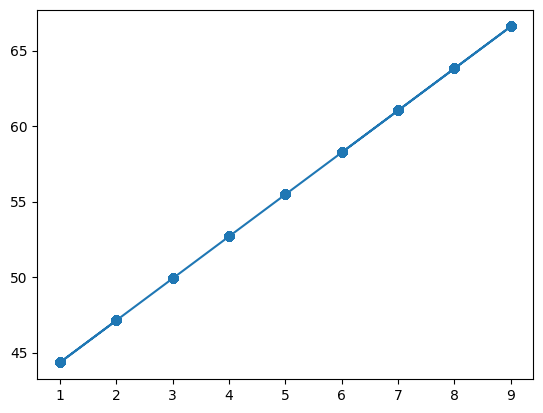

In [21]:
from matplotlib import pyplot as plt


plt.scatter(x_test,y_pred)
Plt.plot(x_test,y_pred)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.140986050718935

In [25]:
r2_score(y_pred,y_test)

-5.055788668467508

# Method 2: Multiple Linear Regression


In [26]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='str')

In [27]:
# Feature Encoding

data["Extracurricular Activities"].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()
data["Extracurricular Activities"] = lab_encoder.fit_transform(data["Extracurricular Activities"])

In [30]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [31]:
x = data.drop("Performance Index",axis=1)
y = data["Performance Index"]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [35]:
multi_lin_model = LinearRegression()
multi_lin_model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [42]:
y_pred = multi_lin_model.predict(x_test)
y_pred[:10]

array([73.86383095, 13.51866713, 49.68079795, 80.29230414, 76.41283091,
       68.72604596, 49.12376707, 40.34296064, 64.63597997, 53.58623839])

In [37]:
y_test[:10]

1660    69.0
7707    16.0
329     51.0
7828    82.0
6887    77.0
7428    66.0
6428    52.0
6234    39.0
4731    63.0
1230    52.0
Name: Performance Index, dtype: float64

In [38]:
print(multi_lin_model.score(x_test,y_test))
print(multi_lin_model.score(x_train,y_train))

0.9889714430830674
0.9885472416154628


In [39]:
r2_score(y_pred,y_test)

0.9888429844612251

In [40]:
r2_score(y_test,y_pred)

0.9889714430830674